<a href="https://colab.research.google.com/github/ImmaculateOkoruwa/DAT4/blob/master/Week0/Introduction_to_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 0
# `Numpy`, Scientific and numeric library


`Numerical Python` popularly known as `Numpy` is core library for scientific computing. It provides high performance multi-dimensional array object and tools for working with these objects.

In the following sections, we will be working on the `Numpy` library and its uses. We will compare the performance of some `Numpy` operations with their classic `Python` equivalent and discuss the uses of the library. Let us begin!

## 1. Comparing `Python` List vs `Numpy` array (This section is optional and can be skipped)

***You DON'T need to memorize this code - it is just to give you a comparison to know why NumPy is better. Reason: It could be overwhelming sometimes as a beginner so don't hesitate to simply skip section 1 and jump to section 2. However, please ensure you read the conclusion***

Consider the following snippet adapted from https://webcourses.ucf.edu/courses/. We start importing the `numpy` and `timeit` libraries. `Numpy`, as we have stated, enables scientific computing and high performance tasks executions with multi-dimensional or n-dimensional arrays. The `Timer` module from `timeit` library is used for the purpose of calculating the time that certain scripts take.

In [367]:
import numpy as np
from timeit import Timer

With imported libraries, we proceed to create two example arrays with numbers in the range [0, 9999]:

In [368]:
size_of_vec = 10000
X_list = range(size_of_vec)
Y_list = range(size_of_vec)
X = np.arange(size_of_vec)
Y = np.arange(size_of_vec)

To compare the performance of two scripts, one explicitly developed with `Python` and another with `Numpy`, we defined two user functions:

In [369]:
def pure_python_version(): #Explicitly Python based with lists
    Z = []
    for i in range(len(X_list)):
        Z.append(X_list[i] + Y_list[i])

def numpy_version(): #Explicitly Numpy based with vectorization
    Z = X + Y

We call the developed functions and measure the time it takes to execute them once:

In [370]:
timer_obj1 = Timer("pure_python_version()",
                   "from __main__ import pure_python_version")
timer_obj2 = Timer("numpy_version()",
                   "from __main__ import numpy_version")

print("Pure python version:",timer_obj1.timeit(10))
print("Numpy version:",timer_obj2.timeit(10))

Pure python version: 0.03380373499931011
Numpy version: 0.00044775099922844674


As we can see, the vectorized sum approach with `Numpy` is much faster than the purely `Python` based approach.

## 2.Creating `Numpy` array from `Python` list

Let's start by creating a `numpy` array from a predefined list with the values 165, 170, 171, 180, 189, and 178:

In [371]:
heights = [165, 170, 171, 180, 189, 178]
print(type(heights))

heights_np = np.array(heights)
print(type(heights_np))

<class 'list'>
<class 'numpy.ndarray'>


In [372]:
y1 = np.array([1,2,3,4,5])
print(y1)
print(type(y1))

[1 2 3 4 5]
<class 'numpy.ndarray'>


The type of object defined at first is a `list`. After conversion with the `.array()` function, the object is converted into a `ndarray` object. This means that we have created an array of multiple dimensions (`n` dimensions) from a `list`. In this case, the `numpy` array is a **one-dimensional array**.

Now let's see how to create a **two-dimensional array**:

In [373]:
weights = np.array([[50, 45, 56, 78],[78, 89, 59, 90],[89, 78, 69, 70],[67, 69, 89, 70],[90,89, 80, 84],[89, 59, 90, 78]])
print("Shape of weights", weights.shape)
print("Type of weights", type(weights))
print(weights.dtype)
print("weights", weights)
#weights_rg = weights.reshape((6,4,1)) #It can be reshaped
#weights_rg

Shape of weights (6, 4)
Type of weights <class 'numpy.ndarray'>
int64
weights [[50 45 56 78]
 [78 89 59 90]
 [89 78 69 70]
 [67 69 89 70]
 [90 89 80 84]
 [89 59 90 78]]


In [374]:
strings = np.array(['a', 'b', 'c', 34, 56])
print(strings)
strings.dtype

['a' 'b' 'c' '34' '56']


dtype('<U21')

## 3. Exploring some of the key attributes of `ndarray` objects

Multidimensional arrays have the following important attributes:

- `ndim`: number of dimensions of the array
- `shape`: shape of the array in the format `(number_rows, number_columns)`
- `size`: total number of elements
- `dtypes`: type of data stored in the array
- `strides`: number of bytes that must be moved to store each row and column in memory, in the format `(number_bytes_files, number_bytes_columns)`

Let's see an example:

In [375]:
print("weights", weights)
print("dimension:", weights.ndim)
print("shape:", weights.shape)
print("size:", weights.size)
print("dtype:", weights.dtype)
print("strides:", weights.strides)

weights [[50 45 56 78]
 [78 89 59 90]
 [89 78 69 70]
 [67 69 89 70]
 [90 89 80 84]
 [89 59 90 78]]
dimension: 2
shape: (6, 4)
size: 24
dtype: int64
strides: (32, 8)


The exemplified arrangement has:

- `ndim` of 2 because it is a two-dimensional array.
- `shape` of (6, 4) as it is made up of 6 rows and 4 columns.
- `size` of 24 since it has 24 elements in total, 6 elements per column or what is the same, 4 elements per row.
- int32 `dtypes` because each element of the array is a 32-bit (4-byte) integer
- `strides` of (16, 4) since 16 bytes (4 integers of 4 bytes in the rows) are needed to store each row in memory and 4 bytes (1 integer per column) to store each column in memory.

## Exercise 1

Convert the two-dimensional `ndarray` `weights` into a three-dimensional object without changing its shape.

In [376]:
weights_3d = weights.reshape((4,6,1))
print("dimension:", weights_3d.ndim)
print("shape:", weights_3d.shape)

dimension: 3
shape: (4, 6, 1)


## 4. Exploring some of the key functions defined for `numpy` arrays

In this section we are going to explore some of the most important functions of `numpy` arrays:

1. `zeros(shape=(n,m))`: Allows to create a zero-array with the shape (`n` rows, `m` columns)
2. `arange(start=i, stop=j, step=u)`: creates a one-dimensional array whose first value is `i` inclusive, last value is `j` exclusive, and each value varies  `s` steps from the previous.
3. `linspace(start=i, stop=j, num=n)`: creates a one-dimensional array whose first value is `i` inclusive, last value is `j` inclusive and contains `n` values in total. Each value differs from the previous one with the same magnitude that differs from the next.
4. `full(shape=(n,m), fill_value=f)`: Allows to create an array with the shape (`n` rows,` m` columns), where all positions have the value `f`.

Let's delve into each of them:

### 4.1. np.zeros()

The `zeros(shape=(n,m), dtypes)` function creates a zero-array with the shape (`n` rows, `m` columns) and data types of `dtypes`:

In [377]:
x = np.zeros(shape=(2,3,5), dtype ="int32")
print(x)

[[[0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]

 [[0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]]


As you can notice, we have created a two-dimensional array of zeros of three rows and five columns where each element is a 32-bit integer.

### 4.2. np.arange()

The `arange(start=i, stop=j, step=u)` function creates a one-dimensional array whose first value is `i` inclusive, last value is `j` exclusive, and each value varies  `s` steps from the previous:

In [378]:
x = np.arange(start=100, stop=1000, step=100, dtype="int32") #size of each part
print(x)

[100 200 300 400 500 600 700 800 900]


In [379]:
y = np.arange(150) #Default initial value of 0, step size is 1
print(y)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]


This function has allowed us to create a one-dimensional array that starts at 100, ends at 1000 (exclusive) and progresses from 100 to 100, with 32-bit integer values.

### 4.3. np.linspace()

The `linspace(start=i, stop=j, num=n)` function creates a one-dimensional array whose first value is `i` inclusive, last value is `j` inclusive and contains `n` values in total. Each value differs from the previous one with the same magnitude that differs from the next. Consider the following example:

In [380]:
x_lin = np.linspace(start=10, stop=50, num=30) # number of parts
print(x_lin)

[10.         11.37931034 12.75862069 14.13793103 15.51724138 16.89655172
 18.27586207 19.65517241 21.03448276 22.4137931  23.79310345 25.17241379
 26.55172414 27.93103448 29.31034483 30.68965517 32.06896552 33.44827586
 34.82758621 36.20689655 37.5862069  38.96551724 40.34482759 41.72413793
 43.10344828 44.48275862 45.86206897 47.24137931 48.62068966 50.        ]


We have created a one-dimensional array that varies linearly from 10 to 50 inclusive, for a total of 30 floating numbers.

### 4.4. np.full()

The `full(shape=(n,m), fill_value=f)` function allows to create an array with the shape (`n` rows,` m` columns), where all positions have the value `f`.

In [381]:
x_ful = np.full(shape=(5,6), fill_value=5)
print(x_ful)

[[5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]]


We see that a two-dimensional array of 5 rows and 6 columns has been created, all with a value of 3 at their positions.

## 5. Exploring additional attributes and functions

Let's review three additional functions: `.reshape()`, `.flatten()` and `.ravel()`.

### 5.1. Reshaping the array

Let's reshape the `weights` numpy array. First take a look to the contant and the shape of `weights`:

In [382]:
weights

array([[50, 45, 56, 78],
       [78, 89, 59, 90],
       [89, 78, 69, 70],
       [67, 69, 89, 70],
       [90, 89, 80, 84],
       [89, 59, 90, 78]])

In [383]:
weights.shape

(6, 4)

The reshaping procedure is done using the `.reshape((n1,m1))` function, which receives as input parameters a tuple of two values `n1` and `m1` that is, the new shape of the array to be created from the original array:

In [384]:
weights = weights.reshape((4,6))
weights

array([[50, 45, 56, 78, 78, 89],
       [59, 90, 89, 78, 69, 70],
       [67, 69, 89, 70, 90, 89],
       [80, 84, 89, 59, 90, 78]])

In [385]:
weights.shape

(4, 6)

Can you see the difference? We have changed the shape of the `weights` array, from 6 rows and 4 columns, to 4 rows and 6 columns. The way the values are distributed in the new array is from left-to-right then top-to-bottom.

Let's add a new dimension through reshaping the current `weights` array:

In [386]:
weights = weights.reshape((6,4))
weights

array([[50, 45, 56, 78],
       [78, 89, 59, 90],
       [89, 78, 69, 70],
       [67, 69, 89, 70],
       [90, 89, 80, 84],
       [89, 59, 90, 78]])

In [387]:
weights.shape

(6, 4)

Now, the array is three-dimensionally estructured. Two bi-dimensional (2D) arrays conform the new array, and each of the 2D arrays have two rows and six columns.

**Resize**

In [388]:
heights_np

array([165, 170, 171, 180, 189, 178])

In [389]:
x4 = np.array([[2.0,3.4,5.6],[9.0,6.7,4.5]])
x4

array([[2. , 3.4, 5.6],
       [9. , 6.7, 4.5]])

In [390]:
x4 = np.resize(x4, (2,5))
print(x4)

[[2.  3.4 5.6 9.  6.7]
 [4.5 2.  3.4 5.6 9. ]]


### 5.2. Flattening the array

The `.flatten()` function returns a copy of an array collapsed into one dimension, no matter how many dimensions the array has. Consider the `weights` two-dimensional array:

In [391]:
weights

array([[50, 45, 56, 78],
       [78, 89, 59, 90],
       [89, 78, 69, 70],
       [67, 69, 89, 70],
       [90, 89, 80, 84],
       [89, 59, 90, 78]])

If we flatten the array, we are re-organizing their elements in a one-dimensional array, as follows:

In [392]:
weights_flattened = weights.flatten() # converts to a single vector
weights_flattened

array([50, 45, 56, 78, 78, 89, 59, 90, 89, 78, 69, 70, 67, 69, 89, 70, 90,
       89, 80, 84, 89, 59, 90, 78])

### 5.3. Raveling the array

The `.ravel()` function returns a flattened view of an array collapsed into one dimension. It works identically to the `.flatten()` function, although a copy in memory is not achieve, just a flatten view of the final result.

Consider the `weights` two-dimensional array:

In [393]:
weights_raveld = weights.ravel()

In [394]:
weights_raveld

array([50, 45, 56, 78, 78, 89, 59, 90, 89, 78, 69, 70, 67, 69, 89, 70, 90,
       89, 80, 84, 89, 59, 90, 78])

Some key differences between flattening and raveling the array are:
- `ravel()` function simply returns a flattened view of Numpy array. If you try to modify this view, you will end up with that same changes in the original array. `flatten()` function returns a flattened copy in memory of the array, so that new changes can be made without affecting the original array.
- `ravel()` does not occupy memory, being faster than `flatten()`, which occupies memory when copying the flattened objects.

## Exercise 2

Create an array of 51 elements starting at 100 and ending at 500, using the two functions `np.linspace()` and `np.arange()`. Arrays must have the same content, with the names `array_lin` and `array_ara`, respectively. Verify that the arrays have the same content with the `np.array_equal()` function.

In [395]:
# 1. Create array_lin using np.linspace()
array_lin = np.linspace(start=100, stop=500, num=51)
print("array_lin:", array_lin)

# 2. Create array_ara using np.arange()
# To have 51 elements from 100 to 500, the step size will be (500-100)/(51-1) = 400/50 = 8
# np.arange is exclusive of the stop value, so we need to go up to 500 + step
step_size = (500 - 100) / (51 - 1)
array_ara = np.arange(start=100, stop=500 + step_size, step=step_size)
print("array_ara:", array_ara)

# 3. Verify that the arrays have the same content with np.array_equal()
is_equal = np.array_equal(array_lin, array_ara)
print("Are array_lin and array_ara equal?:", is_equal)

array_lin: [100. 108. 116. 124. 132. 140. 148. 156. 164. 172. 180. 188. 196. 204.
 212. 220. 228. 236. 244. 252. 260. 268. 276. 284. 292. 300. 308. 316.
 324. 332. 340. 348. 356. 364. 372. 380. 388. 396. 404. 412. 420. 428.
 436. 444. 452. 460. 468. 476. 484. 492. 500.]
array_ara: [100. 108. 116. 124. 132. 140. 148. 156. 164. 172. 180. 188. 196. 204.
 212. 220. 228. 236. 244. 252. 260. 268. 276. 284. 292. 300. 308. 316.
 324. 332. 340. 348. 356. 364. 372. 380. 388. 396. 404. 412. 420. 428.
 436. 444. 452. 460. 468. 476. 484. 492. 500.]
Are array_lin and array_ara equal?: True


In [396]:
x = np.arange(start=100, stop=500, step=100, dtype="int32") #size of each part
print(x)

[100 200 300 400]


In [397]:
x = np.linspace(start=100, stop=500, num=51) # number of parts
print(x)

[100. 108. 116. 124. 132. 140. 148. 156. 164. 172. 180. 188. 196. 204.
 212. 220. 228. 236. 244. 252. 260. 268. 276. 284. 292. 300. 308. 316.
 324. 332. 340. 348. 356. 364. 372. 380. 388. 396. 404. 412. 420. 428.
 436. 444. 452. 460. 468. 476. 484. 492. 500.]


## 6.Array indexing


To access the content of an array we can use indexing through brackets `[ ]`. When using the brackets, we can access the elements on the list by:
1. Using a **positive single index** starting from 0
2. Using a **negative single index** starting from -1
3. Using **positive index intervals** using the `start:end:step` notation to specify starting and ending values as well as the step.
4. Using **negative index intervals** using the `start:end:step` notation to specify negative index starting and ending values as well as the step.

Occasionally, we can:
- Get ride of the the `step` value as `sart:end`, so that by default we slice the data with a `step` of 1.
- Get ride of the `start` value as `:fin:step`, and hence our `start` index will be 0, by default.
- Omit the `end` value as `start::step`, specifying the final position as the `end` index by default.
- Specify the range as `::step`, and hence the `start` position will be 0 and the end position will be the last one of the array.

Let's see how indexing works using the `weights` and `heights_np` arrays:

In [398]:
weights

array([[50, 45, 56, 78],
       [78, 89, 59, 90],
       [89, 78, 69, 70],
       [67, 69, 89, 70],
       [90, 89, 80, 84],
       [89, 59, 90, 78]])

In [399]:
weights_or = weights.reshape((6,4))
weights_or

array([[50, 45, 56, 78],
       [78, 89, 59, 90],
       [89, 78, 69, 70],
       [67, 69, 89, 70],
       [90, 89, 80, 84],
       [89, 59, 90, 78]])

In [400]:
heights_np

array([165, 170, 171, 180, 189, 178])

### 6.1 Using a positive single index

When using positive indexing, it is important to consider the first position of the array to be 0:

In [401]:
print("Accessing single element in 1D array:", heights_np[2])
print("Accessing single element in 2D array:", weights_or[1][3])

Accessing single element in 1D array: 171
Accessing single element in 2D array: 90


In [402]:
heights_np

array([165, 170, 171, 180, 189, 178])

In [403]:
heights_np[:2]

array([165, 170])

In [404]:
heights_np[2:]

array([171, 180, 189, 178])

In [405]:
heights_np[2:4]

array([171, 180])

In [406]:
weights_or[:2,::2]

array([[50, 56],
       [78, 59]])

In [407]:
#heights_np[7]

**Why are we getting this error message?**

Well guessed! It is because position 7 does not exist in the `heights_np` array, it is totally out of the bounds defined by the array's shape and size. The array has 6 elements, the last element being in position 5.

### 6.2 Using a negative single index starting

When using negative indexing, it is important to consider the last position of the array to be -1:

In [408]:
print("Accessing single element in 1D array:", heights_np[-4])
print("Accessing single element in 2D array:", weights_or[-5][-1])

Accessing single element in 1D array: 171
Accessing single element in 2D array: 90


In [409]:
#heights_np[-8]

**Why are we getting this error message again?**

Well guessed! It is because position -8 does not exist in the `heights_np` array, it is totally out of the bounds defined by the array's shape and size. The array has 6 elements, the last element being in position -1 and the first element being in position -6.

### 6.3 Using positive index intervals

When using positive interval indexing `start:end:step`, the starting value is inclusive and the ending value is exlusive. Here are somoe examples:

In [410]:
heights_np[:2] # The default start value is 0

array([165, 170])

In [411]:
heights_np[2:] # The default end value is the last value of the array

array([171, 180, 189, 178])

In [412]:
heights_np[2:3] # The ending value is exlusive

array([171])

In [413]:
weights[:2, ::2]

array([[50, 56],
       [78, 59]])

In [414]:
weights[:3, 3::]

array([[78],
       [90],
       [70]])

In [415]:
#weights[:3, :3, :1]

### 6.4 Using negative index intervals

When using positive interval indexing `start:end:step`, the negative starting value is inclusive and the negative ending value is exlusive. Here are somoe examples:

In [416]:
heights_np[:-4] # Equivalent to heights_np[:2]

array([165, 170])

In [417]:
heights_np[-4:] # Equivalent to heights_np[2:]

array([171, 180, 189, 178])

In [418]:
heights_np[-4:-3] # Equivalent to heights_np[2:3]

array([171])

In [419]:
weights[:2, -3::] # Equivalent to weights[:3, 3::]

array([[45, 56, 78],
       [89, 59, 90]])

In [420]:
#weights[:3, :-3, :-1] # Equivalent to weights[:3, :3, :1]

## Exercise 3

Consider the `weights_or` array:

1. Select all the values that are in the even positions in the rows and in the odd positions in the columns. Create a new array named `weights_custom1` with these values.
2. Express the `weights_custom1` array flattened with an in-memory copy. Call the new array `weights_custom2`.
3. Select items in positions 2 to 4 inclusive with negative indexing. Name the output array as `weights_custom3`.

In [421]:
# Answer #1

In [422]:
# Answer #2

In [423]:
# Answer #3

## 7.Manipulating `Numpy` arrays


Arrays can be manipulated using arithmetic, logical, or relational operations in an element-wise way. Let's see how these operations are applied, using our arrays `weights_or`, `heights_np`, and and some other arrays that we will create.

### 7.1. Arithmetic operations

We are going to operate the content of the arrays with the four traditional arithmetic operations, addition, subtraction, product, and division. Let's first define our arrays again:

In [424]:
weights_or

array([[50, 45, 56, 78],
       [78, 89, 59, 90],
       [89, 78, 69, 70],
       [67, 69, 89, 70],
       [90, 89, 80, 84],
       [89, 59, 90, 78]])

In [425]:
heights_2 = np.array([165, 175, 180, 189, 187, 186])
print('heights_np:', heights_np)
print('heights_2: ', heights_2)

heights_np: [165 170 171 180 189 178]
heights_2:  [165 175 180 189 187 186]


Let's add the content of the two arrays element-wise:

In [426]:
heights_add = heights_np + heights_2
heights_add

array([330, 345, 351, 369, 376, 364])

The `np.add()` function allows adding the content of arrays element-wise:

In [427]:
added = np.add(heights_2, heights_np)
added

array([330, 345, 351, 369, 376, 364])

In [428]:
print("heights_2", heights_2)
print("heights_np", heights_np)

heights_2 [165 175 180 189 187 186]
heights_np [165 170 171 180 189 178]


In [429]:
sub = np.subtract(heights_2, heights_np)
sub

array([ 0,  5,  9,  9, -2,  8])

In [430]:
print("Multiplication (heights_2 * heights_np):")
print(np.multiply(heights_2, heights_np))
print("\nDivision (heights_2 / heights_np):")
print(np.divide(heights_2, heights_np))
print("\nSine of heights_np:")
print(np.sin(heights_np))
print("\nCosine of heights_np:")
print(np.cos(heights_np))

Multiplication (heights_2 * heights_np):
[27225 29750 30780 34020 35343 33108]

Division (heights_2 / heights_np):
[1.         1.02941176 1.05263158 1.05       0.98941799 1.04494382]

Sine of heights_np:
[ 0.99779728  0.34664946  0.97659087 -0.80115264  0.48331795  0.87757534]

Cosine of heights_np:
[-0.06633694  0.93799475  0.21510527 -0.59846007  0.87544489 -0.47943877]


## Exercise 4

Since we have seen how to add element-wise elements of one-dimensional arrays:
1. Calculate the subtraction, multiplication and division between the `heights_np` and `heights_2` arrays. Compare the results by using the functions: `np.subtract()`, `np.multiply()`, and `np.divide()`.
2. Calculate the product element-wise of the multiplicative inverses ($1/x$) between the arrays `heights_np` and `heights_2`, using numpy functions. For instante, if an element in `heights_np` $x1=5$ and an element in `heights_2` $y1=4$, then the result should be $z=(1/x1)*(1/y1)=1/20=0.05$.

In [431]:
# Answer substraction

In [432]:
# Answer multiplication

In [433]:
# Answer division

In [434]:
# Answer multiplicative inverse

### 7.2. Logical operations

Logical operations are mathematical expressions whose result is a Boolean value of 0 (False) or 1 (True). Among the most common logical operations are the disjunction `or`, conjunction `and`, and negation `not`operations, among others. Let's see an example:

In [435]:
x = np.arange(5)
print("x:", x)
np.logical_or(x<1, x>3) #any one condition needs to be satisfied

x: [0 1 2 3 4]


array([ True, False, False, False,  True])

In [436]:
np.logical_and(x==3, x==4) #both conditions must be satisfied

array([False, False, False, False, False])

In [437]:
x = np.array([True, True, False, False])
y = np.array([True, False, True, False])

In [438]:
np.logical_or(x,y)

array([ True,  True,  True, False])

In [439]:
np.logical_and(x,y)

array([ True, False, False, False])

In [440]:
np.logical_not(x)

array([False, False,  True,  True])

### 7.3.Comparison - Relational operators

The comparison operators allow us to compare the values of the content of `numpy` arrays element-wise. Some operators of interest (a) equality operator `np.equal()`, (b) less than operator `np.less()`/`np.less_equal()`, (c) greater than operator `np.greater()`/`np.greater_equal()`, and (d) difference operator `np.not_equal()`. It is important to note that the output will always be Boolean 0 (False) or 1 (True).

Let's see some examples:

In [441]:
x = np.array([1, 8, 3, 7, 3, 21])
y = np.array([4, 8, 1, 7, 6, 9])

In [442]:
np.equal(x,y)

array([False,  True, False,  True, False, False])

In [443]:
np.not_equal(x,y)

array([ True, False,  True, False,  True,  True])

In [444]:
np.less_equal(x,y)

array([ True,  True, False,  True,  True, False])

In [445]:
np.greater_equal(x,y)

array([False,  True,  True,  True, False,  True])

In [446]:
np.array_equal(x,y) # Comparing the entire content of both arrays

False

In [447]:
x = np.array([1, 8, 3, 7, 3, 21])
y = np.array(list((1, 8, 3, 7, 3, 21)))
np.array_equal(x,y) # Comparing the entire content of both arrays

True

## 8. Broadcasting

`numpy` has the ability of operating arrays of different shapes during arithmetic operations using **broadcasting**, so that arithmetic operations on arrays are done on corresponding elements. The boradcasting operation replicates one of the arrays along the dimensions the other, if there is a mismatch of shapes. Consider the following arrays:

In [448]:
heights_np = heights_np.reshape((6,1))
heights_np

array([[165],
       [170],
       [171],
       [180],
       [189],
       [178]])

In [449]:
weights

array([[50, 45, 56, 78],
       [78, 89, 59, 90],
       [89, 78, 69, 70],
       [67, 69, 89, 70],
       [90, 89, 80, 84],
       [89, 59, 90, 78]])

We are going to add the elements of both arrays:

In [450]:
broad_np = heights_np + weights
broad_np

array([[215, 210, 221, 243],
       [248, 259, 229, 260],
       [260, 249, 240, 241],
       [247, 249, 269, 250],
       [279, 278, 269, 273],
       [267, 237, 268, 256]])

Although the arrays have different dimensions, `numpy` makes a sum for the corresponding elements in common rows and columns, in such a way that the elements of the column vector `heights_np` are added with each column of the two-dimensional vector `weights`.

Let's look at one more example:

In [451]:
x = np.ones((3,4))
y = np.random.random((5,1,4))

In [452]:
x

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [453]:
y

array([[[0.28266721, 0.97600332, 0.673068  , 0.44053089]],

       [[0.28968734, 0.50969968, 0.1124609 , 0.22695479]],

       [[0.4785523 , 0.24275816, 0.38798252, 0.81887343]],

       [[0.07454079, 0.92314954, 0.22489608, 0.70637148]],

       [[0.11056546, 0.60100412, 0.40679254, 0.83682945]]])

In [454]:
z = x + y
z

array([[[1.28266721, 1.97600332, 1.673068  , 1.44053089],
        [1.28266721, 1.97600332, 1.673068  , 1.44053089],
        [1.28266721, 1.97600332, 1.673068  , 1.44053089]],

       [[1.28968734, 1.50969968, 1.1124609 , 1.22695479],
        [1.28968734, 1.50969968, 1.1124609 , 1.22695479],
        [1.28968734, 1.50969968, 1.1124609 , 1.22695479]],

       [[1.4785523 , 1.24275816, 1.38798252, 1.81887343],
        [1.4785523 , 1.24275816, 1.38798252, 1.81887343],
        [1.4785523 , 1.24275816, 1.38798252, 1.81887343]],

       [[1.07454079, 1.92314954, 1.22489608, 1.70637148],
        [1.07454079, 1.92314954, 1.22489608, 1.70637148],
        [1.07454079, 1.92314954, 1.22489608, 1.70637148]],

       [[1.11056546, 1.60100412, 1.40679254, 1.83682945],
        [1.11056546, 1.60100412, 1.40679254, 1.83682945],
        [1.11056546, 1.60100412, 1.40679254, 1.83682945]]])

Here each row in array `y` has been paired with rows in array `x`, since they have the same amount of column. The result is an array with triple the rows of array `y` and the same number of columns.

## Exercise 5

Propose an array `y` such that the operation $x + y$ results in the array `z`.
```
x = [[14, 15, 18],
    [62, 90, 98],
    [71, 73, 90],
    [40, 24, 17],
    [11, 81, 14],
    [26, 81, 31]]

z = [[24,  40,  58],
    [72, 115, 138],
    [81,  98, 130],
    [50,  49,  57],
    [21, 106,  54],
    [36, 106,  71]]
```

In [455]:
# Answer

## 9.Matrix multiplication

Let's delve into the element-wise and dot product multiplication between matrices (two-dimensional arrays). First, we define two matrices:

In [456]:
A = np.array([[1,1,8],[0,1,9],[9,0,8]])
print("Matrix A:\n", A, '\n')

B = np.array([[2,0,0],[3,4,9],[7,8,9]])
print('MATRIX B:\n', B, '\n')

Matrix A:
 [[1 1 8]
 [0 1 9]
 [9 0 8]] 

MATRIX B:
 [[2 0 0]
 [3 4 9]
 [7 8 9]] 



The product between the two matrices can be executed with the classic arithmetic operator `*`:

In [457]:
print("Element wise multiplication:\n", A*B, '\n')

Element wise multiplication:
 [[ 2  0  0]
 [ 0  4 81]
 [63  0 72]] 



The dot product of matrices can be executed with the `@` operator or with the numpy `np.dot()` function:

In [458]:
print("Matrix product:\n", A@B, '\n') # matrix A = (2 ,3) , matrix B= (3,4), output matrix =( 2,4)
print("Dot product:\n", A.dot(B), '\n')

Matrix product:
 [[61 68 81]
 [66 76 90]
 [74 64 72]] 

Dot product:
 [[61 68 81]
 [66 76 90]
 [74 64 72]] 



## 10. Arrays with `random` numbers

A random number is a result of a variable combination specified by a distribution function. When no distribution is specified, it is assumed that the continuous uniform distribution in the interval [0,1) is used. Some functions for generating random numpy numbers are:
- `np.random.random()`: returns random floats in the half-open interval [0.0, 1.0)
- `np.random.randint(low, high)`: returns random integers from low (inclusive) to high (exclusive).
- `np.random.normal()`: returns random samples from a normal (Gaussian) distribution.

Let's see some examples:

In [459]:
a = np.ones((4,3), dtype=int)
print("a", a)
b = np.random.random((4,3)) #random numpy array generation
print("b", b)
b += a #addition
print("b", b)


a [[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]
b [[0.25003043 0.45773799 0.5574327 ]
 [0.2519502  0.11024132 0.7266372 ]
 [0.31007394 0.82575397 0.45166653]
 [0.09413893 0.88720324 0.74175413]]
b [[1.25003043 1.45773799 1.5574327 ]
 [1.2519502  1.11024132 1.7266372 ]
 [1.31007394 1.82575397 1.45166653]
 [1.09413893 1.88720324 1.74175413]]


In [460]:
np.random.random((4,3))

array([[0.12193228, 0.85586907, 0.06693827],
       [0.18395199, 0.17216682, 0.92227798],
       [0.66633247, 0.25505676, 0.25131625],
       [0.98403657, 0.67879537, 0.40237128]])

In [461]:
np.random.randint(10, 20, size=(2, 4))

array([[12, 17, 19, 14],
       [15, 17, 19, 17]])

In [462]:
np.random.normal(size=10)

array([-0.57757442, -0.02703262,  2.18854442,  0.90974217,  0.21027564,
        1.79068751,  0.21923031, -0.51807446, -0.13628643,  0.32311408])

Ee can also specify a `seed`, so that the sequence of random numbers is repeatable (if you execute the following code several times, you will get the same random results):

In [463]:
from numpy.random import seed # ensures reproducibility
from numpy.random import rand

# Seed random number generator
seed(45)

# Generate random numbers between 0-1
values = rand(10)
print(values)

rand_1 = np.random.randint(10) # one random integer between 0 and 10
print(rand_1)

gauss = np.random.normal(100) # ten random numbers from a Gaussian distribution
print(gauss)

[0.98901151 0.54954473 0.2814473  0.07728957 0.4444695  0.47280797
 0.048522   0.16332445 0.11595071 0.62739168]
8
102.30440447150066


## 11. Concatenate, and stack `Numpy` arrays

The **concatenation** `np.concatenate()` is a process of joining several arrays to form one, on the same axis. **Stacking** `np.stack()` is a process of joining arrays on a new axis. Let's dive a little bit more on this concepts with practical examples:

In [464]:
my_array = np.array([1,2,34,5])
x = np.array([1,4,5,6])
print('x: \t  ', x)
print('my_array: ', my_array)

x: 	   [1 4 5 6]
my_array:  [ 1  2 34  5]


In [465]:
print('Append:\n',np.append(my_array,x))
y = np.append(my_array, x)

# Concatentate `my_array` and `x`
print('\nConcatenate:\n',np.concatenate((my_array,x)))

Append:
 [ 1  2 34  5  1  4  5  6]

Concatenate:
 [ 1  2 34  5  1  4  5  6]


In [466]:
# Stack arrays vertically (row-wise)
print("Stack row wise:")
print(np.vstack((my_array, x)))

Stack row wise:
[[ 1  2 34  5]
 [ 1  4  5  6]]


In [467]:
# Stack arrays horizontally
print("Stack horizantally:")
print(np.hstack((my_array,x)))

print("\nAnother way:")
print(np.r_[my_array,x])

Stack horizantally:
[ 1  2 34  5  1  4  5  6]

Another way:
[ 1  2 34  5  1  4  5  6]


In [468]:
# Stack arrays column-wise
print("Stack column wise:")
print(np.column_stack(( my_array,x)))

print("\nColumn wise repeat:")
print(np.c_[ my_array,x])

Stack column wise:
[[ 1  1]
 [ 2  4]
 [34  5]
 [ 5  6]]

Column wise repeat:
[[ 1  1]
 [ 2  4]
 [34  5]
 [ 5  6]]


As you have seen, when we concatenate the arrays, we do it on the same axis. When stacking arrays, we do it on a new axis.

## 12. Visualize `Numpy` array

To visualize the content of a numpy array we can make use of the `matplotlib.pyplot` library, which allows us to visualize data and its distributions, among many other functions.

In [469]:
import matplotlib.pyplot as plt

Let's specify an initial state for the Mersenne Twister number generator, a pseudo-random number generator:

In [470]:
rng = np.random.RandomState(10)

Now we generate random values of two normal distributions with different mean and standard deviation, a distribution of mean 0 and another of mean 5, stacking them in a single array horizontally:

In [471]:
a = np.hstack((rng.normal(size=1000),rng.normal(loc=5, scale=2, size=1000)))
a

array([ 1.3315865 ,  0.71527897, -1.54540029, ...,  5.74446677,
        6.22449239,  8.42055014])

Let's visualize the data of the number arrangement of the two distributions, in a histogram with the help of the library `matplotlib.pyplot` to which we have aliased `plt`:

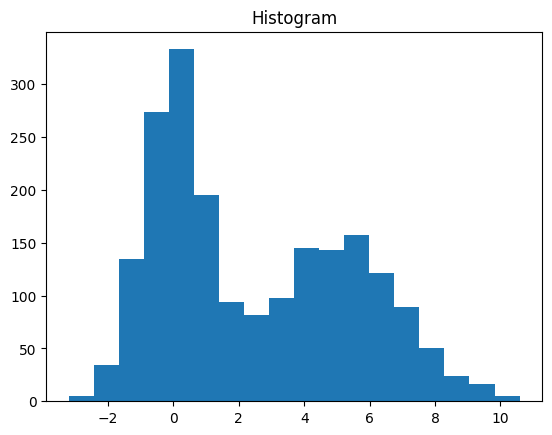

In [472]:
plt.hist(a, bins='auto')
plt.title("Histogram")
plt.show()

As can be seen, this graph denotes the distribution of the two normal distributions with a mean of 0 and 5.

As an additional example, we are creating a meshgrid `np.meshgrid()` with values generated from an array of `numpy` with initial value of 5, final value of -5 (exclusive) and step of 0.01. We have calculated the value of `z` which corresponds to the general equation of a circle, so that we can generate the graph shown below:

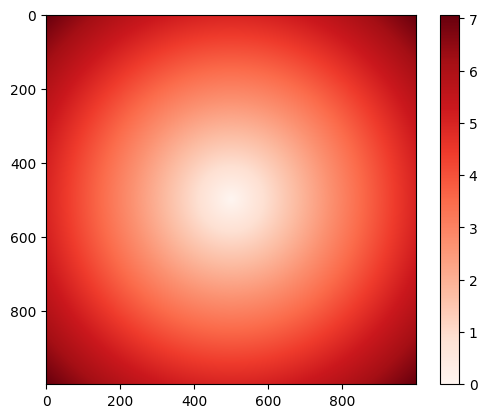

In [473]:
# Create an array
points = np.arange(-5, 5, 0.01)

# Make a meshgrid
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs ** 2 + ys ** 2)

# Display the image on the axes
plt.imshow(z, cmap=plt.cm.Reds)

# Draw a color bar
plt.colorbar()

# Show the plot
plt.show()

## 13. Save the numpy ndarray object into a npy file

Finally, one of the most important parts of the entire analysis process, the storage of the results. We can do this with the `np.savetxt()` function:

## Conclusions

We have learned the fundamentals of the `numpy` library for scientific computing, which allows us to create multidimensional arrays and operate them using arithmetic, logical, and relational operators. We have also learned how to restructure arrangements in various ways, as well as the basic tools for visualization.

In the next case study, we will see what is related to the `pandas` library, so we are ready to do data analysis dynamically and efficiently!